# Project : Investigate a Dataset - FBI Gun Data

## Table of contents

- <a href="#Introduction">Introduction</a>
- <a href="#Data-Wrangling">Data Wrangling</a>
- <a href="#Exploratory-Data-Analysis">Exploratory Data Analysis</a>
- <a href="#Findings">Findings</a>
- <a href="#Conclusions">Conclusions</a>
- <a href="#References">References</a>


## Introduction

### Project Description

The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov.

● The NICS data is found in one sheet of an .xlsx file. It contains
the number of firearm checks by month, state, and type.

● The U.S. census data is found in a .csv file. It contains several
variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year

### Research Questions

● What census data is most associated with high gun per capita?

● Which states have had the highest growth in gun registrations from 2016 to 2017?

● What is the overall trend of gun purchases?

## Data Wrangling

Data wrangling can be defined as the process of cleaning, organizing, and transforming raw data into the desired format for analysts to use for prompt decision-making.

__Data Wrangling Steps__

● Importing Libraries: Numpy, Pandas, Seaborn, Matplotlib.

● Loading the Data

● Data Exploration: Checking for feature data types, unique values, and describing data.

● Null Values: Counting null values and deciding what to do with them. 

● Reshaping and Feature Engineering: This step transforms raw data into a more useful format. Examples of feature engineering include one-hot encoding, aggregation, joins, and grouping.



In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the gun Dataset
## the gun data has been converted to csv and renamed as gun data copy

g_df = pd.read_csv('gun_data_copy.csv')


In [3]:
# Loading the US Census Dataset

c_df = pd.read_csv('U.S. Census Data.csv')


### Data Exploration and Cleaning

In [4]:
# View the first five rows of gun dataset

g_df.head(5)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [5]:
# Summary statistics of gun data numeric columns

g_df.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [6]:
# View the total number of rows and columns in gun dataset

g_df.shape

(12485, 27)

In [7]:
# View the unique values in the month column of the gun dataset
g_df['month'].unique()

array(['2017-09', '2017-08', '2017-07', '2017-06', '2017-05', '2017-04',
       '2017-03', '2017-02', '2017-01', '2016-12', '2016-11', '2016-10',
       '2016-09', '2016-08', '2016-07', '2016-06', '2016-05', '2016-04',
       '2016-03', '2016-02', '2016-01', '2015-12', '2015-11', '2015-10',
       '2015-09', '2015-08', '2015-07', '2015-06', '2015-05', '2015-04',
       '2015-03', '2015-02', '2015-01', '2014-12', '2014-11', '2014-10',
       '2014-09', '2014-08', '2014-07', '2014-06', '2014-05', '2014-04',
       '2014-03', '2014-02', '2014-01', '2013-12', '2013-11', '2013-10',
       '2013-09', '2013-08', '2013-07', '2013-06', '2013-05', '2013-04',
       '2013-03', '2013-02', '2013-01', '2012-12', '2012-11', '2012-10',
       '2012-09', '2012-08', '2012-07', '2012-06', '2012-05', '2012-04',
       '2012-03', '2012-02', '2012-01', '2011-12', '2011-11', '2011-10',
       '2011-09', '2011-08', '2011-07', '2011-06', '2011-05', '2011-04',
       '2011-03', '2011-02', '2011-01', '2010-12', 

In [8]:
#Filter the gun dataset where month is 2010-04 for analysis of Census data April, 2010

g_df_2010 = g_df[(g_df['month'] == '2010-04')]

# View the first five rows of the new dataset

g_df_2010.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
4895,2010-04,Alabama,396.0,NaN,8727.0,8095.0,131.0,394,0.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20791
4896,2010-04,Alaska,0.0,NaN,2650.0,3136.0,64.0,135,0.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6411
4897,2010-04,Arizona,1905.0,NaN,7787.0,5097.0,198.0,309,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16578
4898,2010-04,Arkansas,4303.0,NaN,3865.0,3833.0,45.0,197,1.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14563
4899,2010-04,California,26930.0,NaN,26170.0,27650.0,0.0,0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80750


In [9]:
#Filter the gun dataset where month is 2016-07 for analysis of Census data July, 2016

g_df_2016 = g_df[(g_df['month'] == '2016-07')]

# View the first five rows of the new dataset

g_df_2016.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
770,2016-07,Alabama,27765.0,0.0,10132.0,7392.0,538.0,465,0.0,5.0,...,0.0,NaN,NaN,9.0,5.0,0.0,1.0,1.0,0.0,48927
771,2016-07,Alaska,215.0,0.0,2898.0,2816.0,239.0,165,0.0,7.0,...,0.0,NaN,NaN,7.0,17.0,0.0,1.0,0.0,0.0,6793
772,2016-07,Arizona,7863.0,308.0,13693.0,8643.0,1283.0,642,0.0,5.0,...,0.0,NaN,NaN,13.0,9.0,0.0,0.0,1.0,0.0,34496
773,2016-07,Arkansas,4116.0,677.0,6323.0,5053.0,325.0,367,2.0,6.0,...,0.0,NaN,NaN,7.0,5.0,1.0,0.0,1.0,0.0,19378
774,2016-07,California,77962.0,0.0,46361.0,47594.0,17297.0,0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,190218


In [10]:
# View the total number of rows and columns in new datasets

print(g_df_2010.shape)
print(g_df_2016.shape)

(55, 27)
(55, 27)


In [11]:
# View the first five rows of US Census data

c_df.head(5)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [12]:
# View the total number of rows and columns in US Census data

c_df.shape

(85, 52)

In [13]:
# Information about the US Census data

c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [14]:
# Summary statistics of US Census data numeric columns

c_df.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,X,(c),51.60%,7.30%,50.30%,50.90%,6.80%,3.30%,5.70%,51.60%,...,0.27,0.048,50.40%,2.50%,"625,741","548,439","6,724,540",1.50%,4.80%,7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


### Drop Rows with Missing Values in Census Data

In [15]:
# view missing value count for each feature in US Census data

c_df.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

In [16]:
# drop Fact note as it has alot of missing values 

c_df= c_df.drop(['Fact Note'], axis = 1)

# view missing value count for each feature in US Census data

c_df.isnull().sum()

Fact               5
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia          20
Washington   

In [17]:
# Drop all null values in US Census Data

c_df.dropna(inplace=True)

# view missing value count for each feature in US Census data
c_df.isnull().sum()

Fact              0
Alabama           0
Alaska            0
Arizona           0
Arkansas          0
California        0
Colorado          0
Connecticut       0
Delaware          0
Florida           0
Georgia           0
Hawaii            0
Idaho             0
Illinois          0
Indiana           0
Iowa              0
Kansas            0
Kentucky          0
Louisiana         0
Maine             0
Maryland          0
Massachusetts     0
Michigan          0
Minnesota         0
Mississippi       0
Missouri          0
Montana           0
Nebraska          0
Nevada            0
New Hampshire     0
New Jersey        0
New Mexico        0
New York          0
North Carolina    0
North Dakota      0
Ohio              0
Oklahoma          0
Oregon            0
Pennsylvania      0
Rhode Island      0
South Carolina    0
South Dakota      0
Tennessee         0
Texas             0
Utah              0
Vermont           0
Virginia          0
Washington        0
West Virginia     0
Wisconsin         0


### Drop columns with missing values and not relevant in the new gun datasets

In [18]:
# view missing value count for each feature in the April 2010 gun dataset

g_df_2010.isnull().sum()

month                         0
state                         0
permit                        0
permit_recheck               55
handgun                       0
long_gun                      0
other                         0
multiple                      0
admin                         0
prepawn_handgun               0
prepawn_long_gun              0
prepawn_other                 0
redemption_handgun            0
redemption_long_gun           0
redemption_other              0
returned_handgun             55
returned_long_gun            55
returned_other               55
rentals_handgun              55
rentals_long_gun             55
private_sale_handgun         55
private_sale_long_gun        55
private_sale_other           55
return_to_seller_handgun     55
return_to_seller_long_gun    55
return_to_seller_other       55
totals                        0
dtype: int64

In [19]:
# Drop extraneous columns Use pandas' drop function.

g_df_2010= g_df_2010.drop(['permit_recheck','multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other' ], 
                axis = 1)
# Information about the april 2010 gun dataset

g_df_2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 4895 to 4949
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     55 non-null     object 
 1   state     55 non-null     object 
 2   permit    55 non-null     float64
 3   handgun   55 non-null     float64
 4   long_gun  55 non-null     float64
 5   other     55 non-null     float64
 6   totals    55 non-null     int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 3.4+ KB


In [20]:
# view missing value count for each feature in  the July 2016 gun dataset

g_df_2016.isnull().sum()

month                         0
state                         0
permit                        0
permit_recheck                0
handgun                       0
long_gun                      0
other                         0
multiple                      0
admin                         0
prepawn_handgun               0
prepawn_long_gun              0
prepawn_other                 0
redemption_handgun            0
redemption_long_gun           0
redemption_other              0
returned_handgun              0
returned_long_gun             0
returned_other                0
rentals_handgun              55
rentals_long_gun             55
private_sale_handgun          0
private_sale_long_gun         0
private_sale_other            0
return_to_seller_handgun      0
return_to_seller_long_gun     0
return_to_seller_other        0
totals                        0
dtype: int64

In [21]:
# Drop extraneous columns in gun data Use pandas' drop function.

g_df_2016= g_df_2016.drop(['permit_recheck','multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other' ], 
                axis = 1)

# Information about the July 2016 gun dataset

g_df_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 770 to 824
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     55 non-null     object 
 1   state     55 non-null     object 
 2   permit    55 non-null     float64
 3   handgun   55 non-null     float64
 4   long_gun  55 non-null     float64
 5   other     55 non-null     float64
 6   totals    55 non-null     int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 3.4+ KB


### Check for duplicate data

In [22]:
# print number of duplicates in gun data and US Census data datasets
print(g_df_2010.duplicated().sum())
print(g_df_2016.duplicated().sum())
print(c_df.duplicated().sum())

0
0
0


### Feature Engineering (Gun Data and US Census Data)

In [23]:
# View the unique values in the state column of the April 2010 gun dataset

g_df_2010['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [24]:
# Count of unique values in the state column of the April 2010 gun dataset

g_df_2010['state'].nunique()

55

In [25]:

# Note: Census_data did not include Guam, Puerto Rico, District Columbia, Virgin Islands, and Mariana Islands; 

# Remove name of the states from April 2010 gun dataset : Guam, Puerto Rico, District Columbia, Virgin Islands, and Mariana Islands 
g_df_2010 = g_df_2010[g_df_2010.state != 'Guam']
g_df_2010 = g_df_2010[g_df_2010.state != 'Puerto Rico']
g_df_2010 = g_df_2010[g_df_2010.state != 'District of Columbia']
g_df_2010 = g_df_2010[g_df_2010.state != 'Virgin Islands']
g_df_2010 = g_df_2010[g_df_2010.state != 'Mariana Islands']

g_df_2010['state'].nunique()

50

In [26]:
# View the unique values in the state column of the July 2016 gun dataset

g_df_2016['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [27]:
# Count of unique values in the state column of the July 2016 gun dataset

g_df_2016['state'].nunique()

55

In [28]:
# Note: Census_data did not include Guam, Puerto Rico, District Columbia, Virgin Islands, and Mariana Islands; 

# Remove name of the states from July 2016 gun dataset : Guam, Puerto Rico, District Columbia, Virgin Islands, and Mariana Islands 
g_df_2016 = g_df_2016[g_df_2016.state != 'Guam']
g_df_2016 = g_df_2016[g_df_2016.state != 'Puerto Rico']
g_df_2016 = g_df_2016[g_df_2016.state != 'District of Columbia']
g_df_2016 = g_df_2016[g_df_2016.state != 'Virgin Islands']
g_df_2016 = g_df_2016[g_df_2016.state != 'Mariana Islands']

g_df_2016['state'].nunique()

50

In [29]:
c_df.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [30]:
# Set Fact as index 
c_df = c_df.set_index('Fact')

c_df.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Fact,,,,,,,,,,,,,,,,,,,,,
"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
"Population estimates base, April 1, 2010, (V2016)","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,6.40%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310","9,687,653",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
"Persons under 5 years, percent, July 1, 2016, (V2016)",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,6.40%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [31]:
# Transpose US Census data to match the new gun datasets

c_df_transposed = c_df.T

c_df_transposed.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""


In [32]:
# Reset Index for the transposed dataset

c_df_transposed.reset_index(inplace = True)

c_df_transposed.head()

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
2,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
3,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
4,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""


In [33]:
#Rename index into state

c_df_transposed.rename(columns={"index":"state"}, inplace = True)

c_df_transposed.head()

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
2,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
3,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
4,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""


In [34]:
# change all the column names in the transposed data to lower case

c_df_transposed.columns= c_df_transposed.columns.str.lower()

c_df_transposed.head()

Fact,state,"population estimates, july 1, 2016, (v2016)","population estimates base, april 1, 2010, (v2016)","population, percent change - april 1, 2010 (estimates base) to july 1, 2016, (v2016)","population, census, april 1, 2010","persons under 5 years, percent, july 1, 2016, (v2016)","persons under 5 years, percent, april 1, 2010","persons under 18 years, percent, july 1, 2016, (v2016)","persons under 18 years, percent, april 1, 2010","persons 65 years and over, percent, july 1, 2016, (v2016)",...,"all firms, 2012","men-owned firms, 2012","women-owned firms, 2012","minority-owned firms, 2012","nonminority-owned firms, 2012","veteran-owned firms, 2012","nonveteran-owned firms, 2012","population per square mile, 2010","land area in square miles, 2010",fips code
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
2,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
3,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
4,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""


In [35]:
# Drop extraneous columns in US Census Data

# Drop features that aren't consistent (not present in both datasets) or aren't relevant. Use pandas' drop function.

c_df_transposed.drop(c_df_transposed.iloc[:, 3:], inplace = True, axis = 1)

c_df_transposed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   state                                               50 non-null     object
 1   population estimates, july 1, 2016,  (v2016)        50 non-null     object
 2   population estimates base, april 1, 2010,  (v2016)  50 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


### Fixing Data Types

In [36]:
# View April 2010 gun data column data types

g_df_2010.dtypes

month        object
state        object
permit      float64
handgun     float64
long_gun    float64
other       float64
totals        int64
dtype: object

In [37]:
# View July 2016 gun data column data types

g_df_2016.dtypes

month        object
state        object
permit      float64
handgun     float64
long_gun    float64
other       float64
totals        int64
dtype: object

In [38]:
# View US Census transposed data column data types

c_df_transposed.dtypes

Fact
state                                                 object
population estimates, july 1, 2016,  (v2016)          object
population estimates base, april 1, 2010,  (v2016)    object
dtype: object

In [39]:
c_df_transposed['population estimates, july 1, 2016,  (v2016)'].unique()

array(['4,863,300', '741,894', '6,931,071', '2,988,248', '39,250,017',
       '5,540,545', '3,576,452', '952,065', '20,612,439', '10,310,371',
       '1,428,557', '1,683,140', '12,801,539', '6,633,053', '3,134,693',
       '2,907,289', '4,436,974', '4,681,666', '1,331,479', '6,016,447',
       '6,811,779', '9,928,300', '5,519,952', '2,988,726', '6,093,000',
       '1,042,520', '1,907,116', '2,940,058', '1,334,795', '8,944,469',
       '2081015', '19745289', '10146788', '757952', '11614373', '3923561',
       '4093465', '12784227', '1056426', '4961119', '865454', '6651194',
       '27,862,596', '3,051,217', '624,594', '8,411,808', '7,288,000',
       '1,831,102', '5,778,708', '585,501'], dtype=object)

In [40]:
# replace the comma to fix the error

c_df_transposed['population estimates, july 1, 2016,  (v2016)'] = c_df_transposed['population estimates, july 1, 2016,  (v2016)'].replace(',','', regex=True)

In [41]:
# change datatype to float

c_df_transposed['population estimates, july 1, 2016,  (v2016)'] = c_df_transposed['population estimates, july 1, 2016,  (v2016)'].astype(float)

In [42]:
# replace the comma to fix the error

c_df_transposed['population estimates base, april 1, 2010,  (v2016)'] = c_df_transposed['population estimates base, april 1, 2010,  (v2016)'].replace(',','', regex=True)

In [43]:
# change datatype to float

c_df_transposed['population estimates base, april 1, 2010,  (v2016)'] = c_df_transposed['population estimates base, april 1, 2010,  (v2016)'].astype(float)

In [44]:
# View gun data column data types

c_df_transposed.dtypes

Fact
state                                                  object
population estimates, july 1, 2016,  (v2016)          float64
population estimates base, april 1, 2010,  (v2016)    float64
dtype: object

## Exploratory Data Analysis

### Question 1: What census data is most associated with high gun per capita?

#### Answer this question by dividing the census data by the total number of guns

In [45]:
# View the first five rows of April 2010 gun data

g_df_2010.head()

,month,state,permit,handgun,long_gun,other,totals
4895,2010-04,Alabama,396.0,8727.0,8095.0,131.0,20791
4896,2010-04,Alaska,0.0,2650.0,3136.0,64.0,6411
4897,2010-04,Arizona,1905.0,7787.0,5097.0,198.0,16578
4898,2010-04,Arkansas,4303.0,3865.0,3833.0,45.0,14563
4899,2010-04,California,26930.0,26170.0,27650.0,0.0,80750


In [46]:
# View the first five rows of July 2016 gun data

g_df_2016.head()

,month,state,permit,handgun,long_gun,other,totals
770,2016-07,Alabama,27765.0,10132.0,7392.0,538.0,48927
771,2016-07,Alaska,215.0,2898.0,2816.0,239.0,6793
772,2016-07,Arizona,7863.0,13693.0,8643.0,1283.0,34496
773,2016-07,Arkansas,4116.0,6323.0,5053.0,325.0,19378
774,2016-07,California,77962.0,46361.0,47594.0,17297.0,190218


In [47]:
# Merge April 2010 gun dataset with US Census data using State

merge_april_2010 = pd.merge(g_df_2010, c_df_transposed, on="state")

merge_april_2010.head()

,month,state,permit,handgun,long_gun,other,totals,"population estimates, july 1, 2016, (v2016)","population estimates base, april 1, 2010, (v2016)"
0,2010-04,Alabama,396.0,8727.0,8095.0,131.0,20791,4863300.0,4780131.0
1,2010-04,Alaska,0.0,2650.0,3136.0,64.0,6411,741894.0,710249.0
2,2010-04,Arizona,1905.0,7787.0,5097.0,198.0,16578,6931071.0,6392301.0
3,2010-04,Arkansas,4303.0,3865.0,3833.0,45.0,14563,2988248.0,2916025.0
4,2010-04,California,26930.0,26170.0,27650.0,0.0,80750,39250017.0,37254522.0


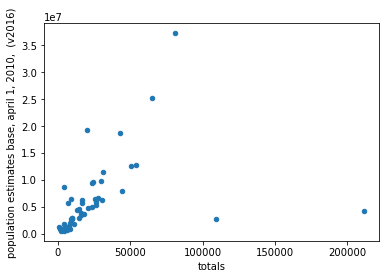

In [48]:
# Scatter plot of april 2010 census data against total number of guns

merge_april_2010.plot(x = 'totals', y = 'population estimates base, april 1, 2010,  (v2016)', kind = 'scatter');

In [49]:
# Checking gun per capita in april 2010

gun_per_capita_april_2010 = merge_april_2010['totals'].sum()/merge_april_2010['population estimates base, april 1, 2010,  (v2016)'].sum()
print(gun_per_capita_april_2010)

0.003978133320178106


In [50]:
# Merge July 2016 gun dataset with US Census data using State

merge_july_2016 = pd.merge(g_df_2016, c_df_transposed, on="state")

merge_july_2016.head()

,month,state,permit,handgun,long_gun,other,totals,"population estimates, july 1, 2016, (v2016)","population estimates base, april 1, 2010, (v2016)"
0,2016-07,Alabama,27765.0,10132.0,7392.0,538.0,48927,4863300.0,4780131.0
1,2016-07,Alaska,215.0,2898.0,2816.0,239.0,6793,741894.0,710249.0
2,2016-07,Arizona,7863.0,13693.0,8643.0,1283.0,34496,6931071.0,6392301.0
3,2016-07,Arkansas,4116.0,6323.0,5053.0,325.0,19378,2988248.0,2916025.0
4,2016-07,California,77962.0,46361.0,47594.0,17297.0,190218,39250017.0,37254522.0


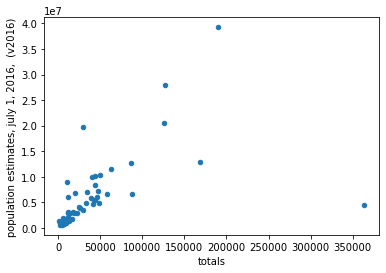

In [51]:
# Scatter plot of 2016 census data against total number of guns

merge_july_2016.plot(x = 'totals', y = 'population estimates, july 1, 2016,  (v2016)', kind = 'scatter');

In [52]:
# Checking gun per capita in 2010
gun_per_capita_july_2016 = merge_july_2016['totals'].sum()/merge_july_2016['population estimates, july 1, 2016,  (v2016)'].sum()
print(gun_per_capita_july_2016)

0.006777933902633841


In [53]:
#Convert to gun_per_capita_2016 to percentage
percent_capita_april_2010 = gun_per_capita_april_2010 * 100
print(percent_capita_april_2010)

0.3978133320178106


In [54]:
#Convert to percentage
percent_capita_july_2016 = gun_per_capita_july_2016 * 100
print(percent_capita_july_2016)

0.677793390263384


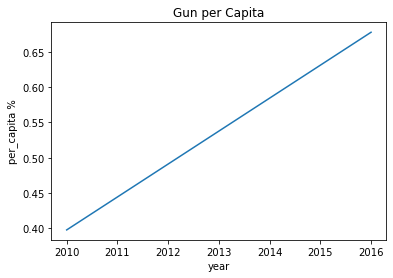

In [55]:
# Gun Per Capital Chart

year = [2010, 2016]
per_capita = [0.3978133320178106, 0.677793390263384]

plt.title('Gun per Capita')
plt.xlabel('year')
plt.ylabel('per_capita %')
plt.plot(year, per_capita)
plt.show()

### Answer

- The census data associated with high gun per capita is population estimates, july 1, 2016,  (v2016) with 0.678%

### Question 2: Which states have had the highest growth in gun registrations (2010,2016)?

#### To check highest growth in gun registrations by state, we need to compare the total number of permits per state in 2010 and 2016.

In [56]:
# View the unique values in the month column of the gun dataset

g_df['month'].unique()

array(['2017-09', '2017-08', '2017-07', '2017-06', '2017-05', '2017-04',
       '2017-03', '2017-02', '2017-01', '2016-12', '2016-11', '2016-10',
       '2016-09', '2016-08', '2016-07', '2016-06', '2016-05', '2016-04',
       '2016-03', '2016-02', '2016-01', '2015-12', '2015-11', '2015-10',
       '2015-09', '2015-08', '2015-07', '2015-06', '2015-05', '2015-04',
       '2015-03', '2015-02', '2015-01', '2014-12', '2014-11', '2014-10',
       '2014-09', '2014-08', '2014-07', '2014-06', '2014-05', '2014-04',
       '2014-03', '2014-02', '2014-01', '2013-12', '2013-11', '2013-10',
       '2013-09', '2013-08', '2013-07', '2013-06', '2013-05', '2013-04',
       '2013-03', '2013-02', '2013-01', '2012-12', '2012-11', '2012-10',
       '2012-09', '2012-08', '2012-07', '2012-06', '2012-05', '2012-04',
       '2012-03', '2012-02', '2012-01', '2011-12', '2011-11', '2011-10',
       '2011-09', '2011-08', '2011-07', '2011-06', '2011-05', '2011-04',
       '2011-03', '2011-02', '2011-01', '2010-12', 

In [57]:
# Convert the month to datetime64

g_df['month'] = pd.to_datetime(g_df['month'], format='%Y-%m-%d')

g_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  object        
 2   permit                     12461 non-null  float64       
 3   permit_recheck             1100 non-null   float64       
 4   handgun                    12465 non-null  float64       
 5   long_gun                   12466 non-null  float64       
 6   other                      5500 non-null   float64       
 7   multiple                   12485 non-null  int64         
 8   admin                      12462 non-null  float64       
 9   prepawn_handgun            10542 non-null  float64       
 10  prepawn_long_gun           10540 non-null  float64       
 11  prepawn_other              5115 non-null   float64       
 12  rede

In [58]:
# Filter data to get 2010 gun dataset

df_2010 = g_df.loc[(g_df['month'] >= '2010-01-01') & (g_df['month'] < '2010-12-31')]

df_2010['month'].unique()

array(['2010-12-01T00:00:00.000000000', '2010-11-01T00:00:00.000000000',
       '2010-10-01T00:00:00.000000000', '2010-09-01T00:00:00.000000000',
       '2010-08-01T00:00:00.000000000', '2010-07-01T00:00:00.000000000',
       '2010-06-01T00:00:00.000000000', '2010-05-01T00:00:00.000000000',
       '2010-04-01T00:00:00.000000000', '2010-03-01T00:00:00.000000000',
       '2010-02-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [59]:
# get the first 5 rows of 2010 gun dataset

df_2010.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
4455,2010-12-01,Alabama,413.0,NaN,13978.0,24298.0,152.0,569,0.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43266
4456,2010-12-01,Alaska,0.0,NaN,2553.0,3950.0,93.0,146,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7036
4457,2010-12-01,Arizona,2082.0,NaN,9943.0,9814.0,219.0,431,0.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23942
4458,2010-12-01,Arkansas,2582.0,NaN,5816.0,12455.0,62.0,257,1.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23821
4459,2010-12-01,California,24901.0,NaN,24519.0,32100.0,0.0,0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81522


In [60]:
# Filter data to get 2016 gun dataset

df_2016 = g_df.loc[(g_df['month'] >= '2016-01-01') & (g_df['month'] < '2016-12-31')]

df_2016['month'].unique()

array(['2016-12-01T00:00:00.000000000', '2016-11-01T00:00:00.000000000',
       '2016-10-01T00:00:00.000000000', '2016-09-01T00:00:00.000000000',
       '2016-08-01T00:00:00.000000000', '2016-07-01T00:00:00.000000000',
       '2016-06-01T00:00:00.000000000', '2016-05-01T00:00:00.000000000',
       '2016-04-01T00:00:00.000000000', '2016-03-01T00:00:00.000000000',
       '2016-02-01T00:00:00.000000000', '2016-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [61]:
# View the first 5 rows of 2016 gun dataset

df_2016.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
495,2016-12-01,Alabama,26996.0,0.0,13733.0,17519.0,376.0,533,0.0,10.0,...,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,62014
496,2016-12-01,Alaska,254.0,0.0,4087.0,3698.0,243.0,191,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8786
497,2016-12-01,Arizona,8900.0,121.0,18024.0,13785.0,1180.0,703,0.0,10.0,...,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,44887
498,2016-12-01,Arkansas,3294.0,692.0,9192.0,13433.0,277.0,385,37.0,4.0,...,0.0,0.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,29926
499,2016-12-01,California,61808.0,0.0,63649.0,93224.0,77929.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,298161


In [62]:
# Use the groupby function and sum function the summarise the 2010 gun dataset by state

high_reg_2010 = df_2010.groupby('state').sum()

high_reg_2010.head(5)

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
state,,,,,,,,,,,,,,,,,,,,,
Alabama,4621.0,0.0,116963.0,136519.0,1771.0,5465,19.0,115.0,183.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308607
Alaska,0.0,0.0,25720.0,33177.0,825.0,1519,0.0,85.0,122.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65909
Arizona,24751.0,0.0,89162.0,69067.0,2091.0,3768,0.0,57.0,38.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206050
Arkansas,31305.0,0.0,49992.0,72206.0,636.0,3145,64.0,148.0,372.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,191448
California,295252.0,0.0,245159.0,275458.0,0.0,0,530.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,816399


In [63]:
# Reset the 2010 grouped gun dataset index

high_reg_2010.reset_index(inplace = True)

high_reg_2010.head()

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,Alabama,4621.0,0.0,116963.0,136519.0,1771.0,5465,19.0,115.0,183.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308607
1,Alaska,0.0,0.0,25720.0,33177.0,825.0,1519,0.0,85.0,122.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65909
2,Arizona,24751.0,0.0,89162.0,69067.0,2091.0,3768,0.0,57.0,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206050
3,Arkansas,31305.0,0.0,49992.0,72206.0,636.0,3145,64.0,148.0,372.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,191448
4,California,295252.0,0.0,245159.0,275458.0,0.0,0,530.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,816399


In [64]:
# Sort the data by permit in descending order

high_reg_2010= high_reg_2010.sort_values(by=['permit'], axis = 0, ascending = False)

# Create a new dataframe with state and permit

high_reg_2010 = high_reg_2010[['state','permit']]

# View the first 10 rows of the new dataframe

high_reg_2010.head(10)

,state,permit
18,Kentucky,2149338.0
47,Utah,481563.0
14,Illinois,463699.0
4,California,295252.0
24,Michigan,194283.0
35,North Carolina,150722.0
46,Texas,122062.0
25,Minnesota,109840.0
15,Indiana,105419.0
45,Tennessee,102940.0


##### Top 10 states with gun registrations in 2010

- Kentucky
- Utah
- Illinois
- California
- Michigan
- North Carolina
- Texas
- Minnesota
- Indiana
- Tennessee

In [65]:
# Use the groupby function and sum function the summarise the 2016 gun dataset by state

high_reg_2016 = df_2016.groupby('state').sum()

high_reg_2016.head()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
state,,,,,,,,,,,,,,,,,,,,,
Alabama,291039.0,0.0,153123.0,121963.0,6104.0,6545,5.0,111.0,114.0,2.0,...,0.0,0.0,0.0,72.0,65.0,4.0,3.0,2.0,0.0,616947
Alaska,3121.0,0.0,37491.0,36887.0,2889.0,2316,0.0,84.0,70.0,0.0,...,0.0,0.0,0.0,39.0,66.0,1.0,2.0,3.0,0.0,87647
Arizona,87771.0,5109.0,166784.0,108988.0,13122.0,7908,0.0,74.0,60.0,3.0,...,1.0,0.0,0.0,76.0,56.0,11.0,11.0,11.0,1.0,416279
Arkansas,55456.0,7036.0,80244.0,82120.0,3059.0,4400,143.0,77.0,116.0,3.0,...,0.0,0.0,0.0,72.0,64.0,6.0,7.0,4.0,1.0,266014
California,1036981.0,0.0,560355.0,554550.0,211707.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2377167


In [66]:
# Reset the 2016 grouped gun dataset index

high_reg_2016.reset_index(inplace = True)

high_reg_2016.head()

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,Alabama,291039.0,0.0,153123.0,121963.0,6104.0,6545,5.0,111.0,114.0,...,0.0,0.0,0.0,72.0,65.0,4.0,3.0,2.0,0.0,616947
1,Alaska,3121.0,0.0,37491.0,36887.0,2889.0,2316,0.0,84.0,70.0,...,0.0,0.0,0.0,39.0,66.0,1.0,2.0,3.0,0.0,87647
2,Arizona,87771.0,5109.0,166784.0,108988.0,13122.0,7908,0.0,74.0,60.0,...,1.0,0.0,0.0,76.0,56.0,11.0,11.0,11.0,1.0,416279
3,Arkansas,55456.0,7036.0,80244.0,82120.0,3059.0,4400,143.0,77.0,116.0,...,0.0,0.0,0.0,72.0,64.0,6.0,7.0,4.0,1.0,266014
4,California,1036981.0,0.0,560355.0,554550.0,211707.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2377167


In [67]:
# Sort the data by permit in descending order

high_reg_2016= high_reg_2016.sort_values(by=['permit'], axis = 0, ascending = False)

# Create a new dataframe with state and permit

high_reg_2016 = high_reg_2016[['state','permit']]

# View the first 10 rows of the new dataframe

high_reg_2016.head(10)

,state,permit
18,Kentucky,3372613.0
4,California,1036981.0
14,Illinois,962930.0
15,Indiana,946912.0
46,Texas,390462.0
25,Minnesota,350315.0
35,North Carolina,345364.0
9,Florida,337086.0
40,Pennsylvania,333755.0
0,Alabama,291039.0


##### Top 10 states with gun registrations in 2016

- Kentucky
- California
- Illinois
- Indiana
- Texas
- Minnesota
- North Carolina
- Florida
- Pennsylvania

In [68]:
# Merge the new dataframes on state

high_reg = pd.merge(high_reg_2016, high_reg_2010, on="state")

high_reg.head(10)

# permit_x = 2016
# permit_y = 2010

,state,permit_x,permit_y
0,Kentucky,3372613.0,2149338.0
1,California,1036981.0,295252.0
2,Illinois,962930.0,463699.0
3,Indiana,946912.0,105419.0
4,Texas,390462.0,122062.0
5,Minnesota,350315.0,109840.0
6,North Carolina,345364.0,150722.0
7,Florida,337086.0,35.0
8,Pennsylvania,333755.0,2569.0
9,Alabama,291039.0,4621.0


In [69]:
# Calculate the percentage growth

increase = high_reg['permit_x']- high_reg['permit_y']

increase_ratio = increase/high_reg['permit_y']

percent_growth = increase_ratio * 100

print(percent_growth)

0     5.691404e+01
1     2.512190e+02
2     1.076627e+02
3     7.982366e+02
4     2.198883e+02
5     2.189321e+02
6     1.291397e+02
7     9.630029e+05
8     1.289163e+04
9     6.198182e+03
10    2.349197e+02
11    2.927636e+01
12    1.429319e+02
13    1.994300e+07
14   -6.295542e+01
15    1.674480e+07
16    9.717711e+01
17    2.090484e+02
18    6.378461e+01
19    3.052263e+00
20    6.676814e+01
21    2.939034e+02
22    2.546160e+02
23    5.581606e+02
24    1.105669e+02
25    7.714742e+01
26    6.522781e+01
27    1.120575e+02
28    1.768280e+02
29    9.005250e+05
30             inf
31    1.321482e+02
32    1.487542e+04
33    4.897543e+02
34    1.610666e+02
35    3.840818e+02
36    5.794623e+01
37             inf
38    7.467901e+01
39    2.268329e+02
40             inf
41             inf
42    3.417850e+01
43             inf
44             inf
45    4.973251e+02
46   -4.406780e+01
47    7.100000e+03
48             NaN
49             NaN
50             NaN
51             NaN
52          

In [70]:
# add the derived percentage growth to the merged data

high_reg['percent_growth'] = percent_growth

high_reg.head(10)

,state,permit_x,permit_y,percent_growth
0,Kentucky,3372613.0,2149338.0,56.914036
1,California,1036981.0,295252.0,251.218959
2,Illinois,962930.0,463699.0,107.662729
3,Indiana,946912.0,105419.0,798.236561
4,Texas,390462.0,122062.0,219.888254
5,Minnesota,350315.0,109840.0,218.932083
6,North Carolina,345364.0,150722.0,129.139741
7,Florida,337086.0,35.0,963002.857143
8,Pennsylvania,333755.0,2569.0,12891.630985
9,Alabama,291039.0,4621.0,6198.182212


In [71]:
#Sort the data by percentage growth in descending order

sort_high_reg= high_reg.sort_values(by=['percent_growth'], axis = 0, ascending = False)

sort_high_reg.head(55)

,state,permit_x,permit_y,percent_growth
41,Delaware,8440.0,0.0,inf
44,Alaska,3121.0,0.0,inf
30,Louisiana,35141.0,0.0,inf
37,South Dakota,16279.0,0.0,inf
40,Virginia,9817.0,0.0,inf
43,Maine,6986.0,0.0,inf
13,Wisconsin,199431.0,1.0,1.994300e+07
15,Ohio,167449.0,1.0,1.674480e+07
7,Florida,337086.0,35.0,9.630029e+05
29,Maryland,36025.0,4.0,9.005250e+05


- Louisiana, Virginia, Delaware, South Dakota, Alaska and Maine had no gun registration in year 2010 but have in 2016

- Guam, Rhode Island, Puerto Rico, Vermont, Mariana Islands, New Jersey and Oklahoma and on data on gun registration

- Virgin Islands and Utah gun registrations declined in 2016

- Wisconsin, Ohio, Florida, Maryland, West Virginia and Pennsylvania have a significant growth in gun registration

### Lets look at the correlation between number of permits and the major gun types(handgun, long gun, other and multiple)

In [72]:
g_df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [73]:
permits_per_gun_type = g_df[['state','permit','handgun','long_gun','other', 'multiple', 'totals']]

permits_per_gun_type.head()

,state,permit,handgun,long_gun,other,multiple,totals
0,Alabama,16717.0,5734.0,6320.0,221.0,317,32019
1,Alaska,209.0,2320.0,2930.0,219.0,160,6303
2,Arizona,5069.0,11063.0,7946.0,920.0,631,28394
3,Arkansas,2935.0,4347.0,6063.0,165.0,366,17747
4,California,57839.0,37165.0,24581.0,2984.0,0,123506


In [74]:
p = permits_per_gun_type.groupby('state').sum()

p.head()

,permit,handgun,long_gun,other,multiple,totals
state,,,,,,
Alabama,1047441.0,2222037.0,2626029.0,39578.0,105230,6706079
Alaska,13352.0,434602.0,572174.0,15970.0,28904,1137643
Arizona,710509.0,1781468.0,1480762.0,56832.0,84979,4425714
Arkansas,507951.0,965584.0,1663256.0,13053.0,61919,3752633
California,6530543.0,5910880.0,5936770.0,342635.0,207864,19014063


In [75]:
np.corrcoef(p['permit'], p['handgun'])[0,1]

0.22818281573599725

- there is a weak positive correlation between two variables

In [76]:
np.corrcoef(p['permit'], p['long_gun'])[0,1]

0.22909103790217003

- there is a weak positive correlation between two variables

In [77]:
np.corrcoef(p['permit'], p['other'])[0,1]

0.16416454352746437

- there is little or no  correlation between two variables

In [78]:
np.corrcoef(p['permit'], p['multiple'])[0,1]

0.22365552575199713

- there is a weak positive correlation between two variables.

True


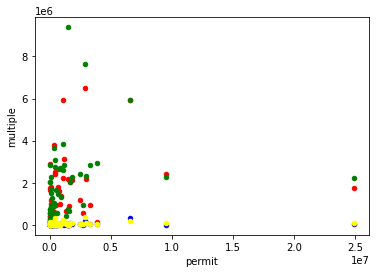

In [79]:
#Scatter plot to visualise the relationship between permit and the major gun types ( handgun, long gun, other, multiple)

ax1 = p.plot(kind='scatter', x='permit', y= 'handgun', color='r')    
ax2 = p.plot(kind='scatter', x='permit', y= 'long_gun', color='g', ax=ax1)    
ax3 = p.plot(kind='scatter', x='permit', y= 'other', color='b', ax=ax1)
ax4 = p.plot(kind='scatter', x='permit', y= 'multiple', color='yellow', ax=ax1)

print(ax1 == ax2 == ax3 == ax4)  # True

 ### Question 3: What is the overall trend of gun purchases?
 
 #### Check the overall gun purchases in the gun data


In [80]:
# View the gun dataset

g_df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [81]:
#Create a new datframe from the gun data showing only the major types of gun

g_trend = g_df[['handgun','long_gun', 'other','multiple']]

g_trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   handgun   12465 non-null  float64
 1   long_gun  12466 non-null  float64
 2   other     5500 non-null   float64
 3   multiple  12485 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 390.3 KB


In [82]:
# Total number of hand guns

g_trend['handgun'].sum()

74053083.0

In [83]:
# Total number of long guns

g_trend['long_gun'].sum()

97370026.0

In [84]:
# Total number of other guns

g_trend['other'].sum()

1982594.0

In [85]:
# Total number of multiple guns

g_trend['multiple'].sum()

3353513

In [86]:
# Create lists

gun = ['hand gun', 'long gun', 'other', 'multiple']
purchases = [74053083, 97370026, 1982594, 3353513]

# Create dataframe with lists

gun_trend = pd.DataFrame({'gun': ['hand gun', 'long gun', 'other', 'multiple'],
                   'purchases': [74053083, 97370026, 1982594, 3353513]})

# View dataframe

gun_trend.head()

,gun,purchases
0,hand gun,74053083
1,long gun,97370026
2,other,1982594
3,multiple,3353513


### Define a function to create bar charts

In [87]:
x = gun_trend['gun']
y = gun_trend['purchases']

def makebar(x, y, xlabel, ylabel, title, color = None):
    bar_width = 0.5
    color = color
    fig, ax = plt.subplots()
    ax.bar(x, y, width=bar_width, color = color)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

<ipython-input-87-dfeb50e5366d>:8: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.bar(x, y, width=bar_width, color = color)


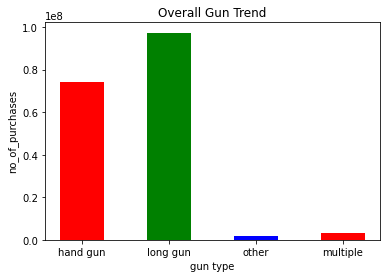

In [88]:
# Bar chart of the types of gun against number of purchases in the gun dataset with defined function

makebar(gun, purchases, 'gun type', 'no_of_purchases', "Overall Gun Trend", color = 'rgb')

- Long guns are purchased the most in the gun dataset

 #### Check the gun purchases in the 2010

In [89]:
g_trend_2010 = df_2010[['handgun','long_gun', 'other','multiple']]

g_trend_2010.head()

,handgun,long_gun,other,multiple
4455,13978.0,24298.0,152.0,569
4456,2553.0,3950.0,93.0,146
4457,9943.0,9814.0,219.0,431
4458,5816.0,12455.0,62.0,257
4459,24519.0,32100.0,0.0,0


In [90]:
g_trend_2010['handgun'].sum()

3678001.0

In [91]:
g_trend_2010['long_gun'].sum()

4842184.0

In [92]:
g_trend_2010['other'].sum()

52761.0

In [93]:
g_trend_2010['multiple'].sum()

180609

In [94]:
# Create list

gun_2010 = ['hand gun', 'long gun', 'other', 'multiple']
purchases_2010 = [2982908, 3623610, 43752, 146543]

# Create dataframe using the lists

gun_trend_2010 = pd.DataFrame({'gun_2010': ['hand gun', 'long gun', 'other', 'multiple'],
                   'purchases_2010': [2982908, 3623610, 43752, 146543]})

# View dataframe

gun_trend_2010.head()

,gun_2010,purchases_2010
0,hand gun,2982908
1,long gun,3623610
2,other,43752
3,multiple,146543


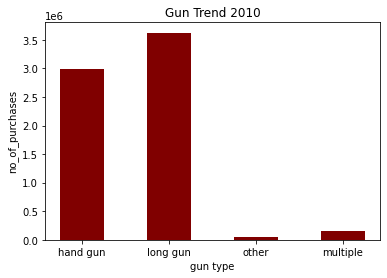

In [95]:
# Bar chart of the types of gun against number of purchases in the  2010 gun dataset with defined function


makebar(gun_2010, purchases_2010, 'gun type', 'no_of_purchases', "Gun Trend 2010", color = 'maroon')

- Long guns are purchased the most in 2010

 #### Check the gun purchases in 2016 

In [96]:
g_trend_2016 = df_2016[['handgun','long_gun', 'other','multiple']]
g_trend_2016.head()

,handgun,long_gun,other,multiple
495,13733.0,17519.0,376.0,533
496,4087.0,3698.0,243.0,191
497,18024.0,13785.0,1180.0,703
498,9192.0,13433.0,277.0,385
499,63649.0,93224.0,77929.0,0


In [97]:
g_trend_2016['handgun'].sum()

8085498.0

In [98]:
g_trend_2016['long_gun'].sum()

5988511.0

In [99]:
g_trend_2016['other'].sum()

586137.0

In [100]:
g_trend_2016['multiple'].sum()

257723

In [101]:
# Create lists

gun_2016 = ['hand gun', 'long gun', 'other', 'multiple']
purchases_2016 = [6492102, 4447379, 409009, 208811]

# Create dataframe using the lists

gun_trend_2016 = pd.DataFrame({'gun_2016': ['hand gun', 'long gun', 'other', 'multiple'],
                   'purchases_2016': [6492102, 4447379, 409009, 208811]})

# View dataframe

gun_trend_2016.head()

,gun_2016,purchases_2016
0,hand gun,6492102
1,long gun,4447379
2,other,409009
3,multiple,208811


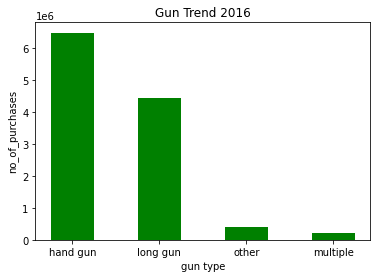

In [102]:
# Bar chart of the types of gun against number of purchases in the  2016 gun dataset with defined function


makebar(gun_2016, purchases_2016, 'gun type', 'no_of_purchases', "Gun Trend 2016", color = 'green')

- Handguns are  purchased the most in 2016

 #### Check the gun purchases in the last year in the gun dataset (2017)

In [103]:
# Filter data between two dates
df_2017 = g_df.loc[(g_df['month'] >= '2017-01-01') & (g_df['month'] < '2017-12-31')]

df_2017['month'].unique()

array(['2017-09-01T00:00:00.000000000', '2017-08-01T00:00:00.000000000',
       '2017-07-01T00:00:00.000000000', '2017-06-01T00:00:00.000000000',
       '2017-05-01T00:00:00.000000000', '2017-04-01T00:00:00.000000000',
       '2017-03-01T00:00:00.000000000', '2017-02-01T00:00:00.000000000',
       '2017-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [104]:
g_trend_2017 = df_2017[['handgun','long_gun', 'other','multiple']]

g_trend_2017.head()

,handgun,long_gun,other,multiple
0,5734.0,6320.0,221.0,317
1,2320.0,2930.0,219.0,160
2,11063.0,7946.0,920.0,631
3,4347.0,6063.0,165.0,366
4,37165.0,24581.0,2984.0,0


In [105]:
g_trend_2017['handgun'].sum()

5242703.0

In [106]:
g_trend_2017['long_gun'].sum()

3421362.0

In [107]:
g_trend_2017['other'].sum()

276990.0

In [108]:
g_trend_2017['multiple'].sum()

169389

In [109]:
# Create a lists

gun_2017 = ['hand gun', 'long gun', 'other', 'multiple']
purchases_2017 = [5242703, 3421362, 276990, 169389]

# Create dataframe using the lists

gun_trend_2017 = pd.DataFrame({'gun_2017': ['hand gun', 'long gun', 'other', 'multiple'],
                   'purchases_2017': [5242703, 3421362, 276990, 169389]})

# View dataframe

gun_trend_2017.head()

,gun_2017,purchases_2017
0,hand gun,5242703
1,long gun,3421362
2,other,276990
3,multiple,169389


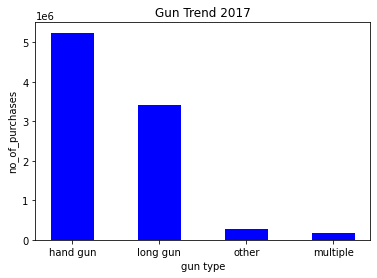

In [110]:
# Bar chart of the types of gun against number of purchases in the  2017 gun dataset with defined function


makebar(gun_2017, purchases_2017, 'gun type', 'no_of_purchases', "Gun Trend 2017", color = 'blue')

- Handguns are purchased the most in 2017


## Findings

- Gun per capital in April 2010 is 0.398%.
- Gun per capital in july 2016 is 0.678%.
- Top 10 states with gun registrations in 2010 are Kentucky,Utah, Illinois, California,
Michigan, North Carolina, Texas, Minnesota, Indiana, Tennessee.
- Top 10 States with gun registrations in 2016 are Kentucky, California, Illinois,
Indiana, Texas, Minnesota, North Carolina, Florida, Pennsylvania.
- Louisiana, Virginia, Delaware, South Dakota, Alaska and Maine had no gun registration in year 2010 but have in 2016.
- Guam, Rhode Island, Puerto Rico, Vermont, Mariana Islands, New Jersey and Oklahoma and on data on gun registration.
- Virgin Islands and Utah gun registrations declined in 2016.
- Wisconsin, Ohio, Florida, Maryland, West Virginia and Pennsylvania have a significant growth in gun registration.
- Long guns are purchased the most in the gun dataset.
- Long guns are purchased the most in 2010.
- Handguns are  purchased the most in 2016.
- Handguns are purchased the most in 2017.

## Conclusion

From analysis, the census data that is associated with high gun per capital is July 2016 census data with 0.678%. This shows there is an increase in the number of gun owners in July, 2016 compared to April, 2010.

Gun ownership also varied across states in the United States ranging from low rates of ownership in states such as Maine, New York, New Jersey, Delaware, Vermont, Massachusetts, Rhode Island, Connecticut, New Hampshire, and Pennsylvania to high rates of ownership in states such as Kentucky, Utah, Illinois, California, North Carolina, Texas, Minnesota, Indiana, Tennessee, Texas.

The Data shows a definite tendency to favor handguns over long guns as shown in the analysis in recent years.

In terms of limitations, census data contains missing data for US colonies such as Guam, Puerto Rico, District of Columbia, Virgin Islands, and Mariana Islands. It would be appropriate to include them in census data set in order to determine and ascertain the result of gun per capita.

## References

- https://en.wikipedia.org/wiki/Gun_laws_in_the_United_States_by_state
- https://en.wikipedia.org/wiki/Gun_violence_in_the_United_States
